In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import pandas as pd

In [0]:
#Question 1 Explorer data
iris = datasets.load_iris()
X = iris.data
y = iris.target

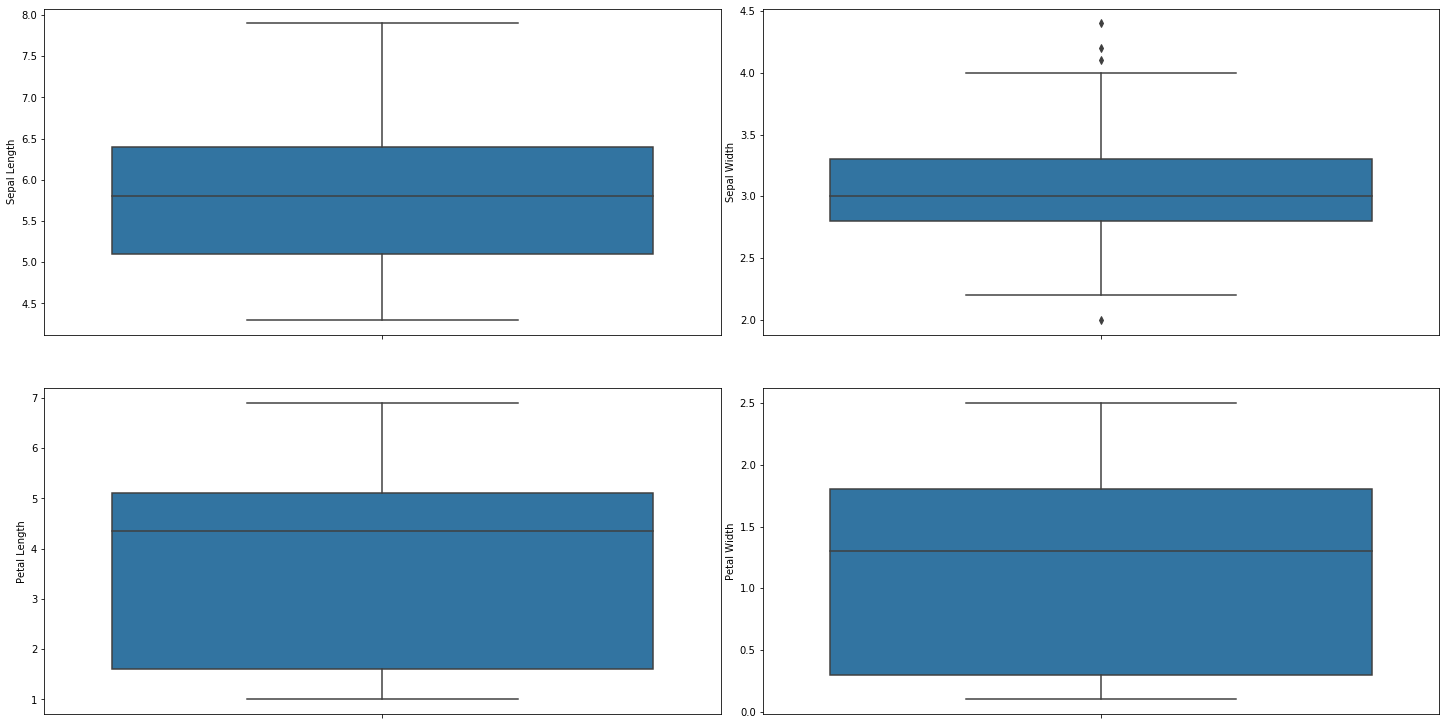

In [3]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
data = pd.DataFrame(X,
                 columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width' ])
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
#Conclusion: We can find that only the Sepal Width has some outliers

In [4]:
#Question 1 Find missing data
np.isnan(np.min(X, axis=0))

#Conclusion: There is no missing data in training set

array([False, False, False, False])

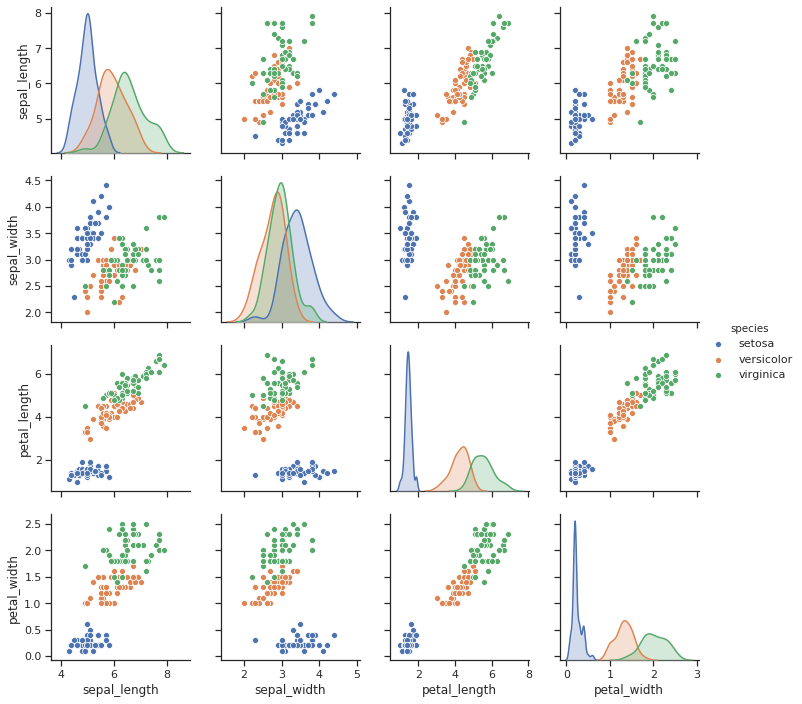

In [5]:
# scatter plot matrix
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
#Conclusion: We find that by using the last two features we can well seperate the dataset.

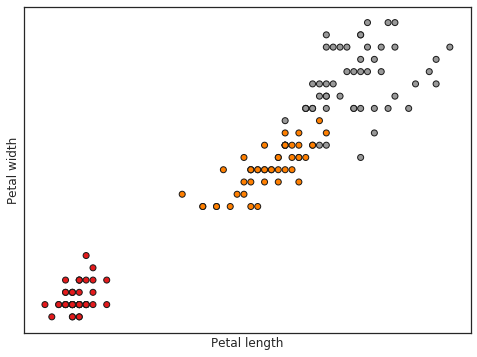

In [6]:
# Take the first two features
X_plot_2D = iris.data[:, 2:]  
y = iris.target


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_plot_2D[:, 0], X_plot_2D[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')


plt.xticks(())
plt.yticks(())

plt.show()

In [7]:
iris_dataframe = px.data.iris()
fig = px.parallel_coordinates(iris_dataframe, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()
#Conclusion: We find that by using the last two features we can have a good result.

[]

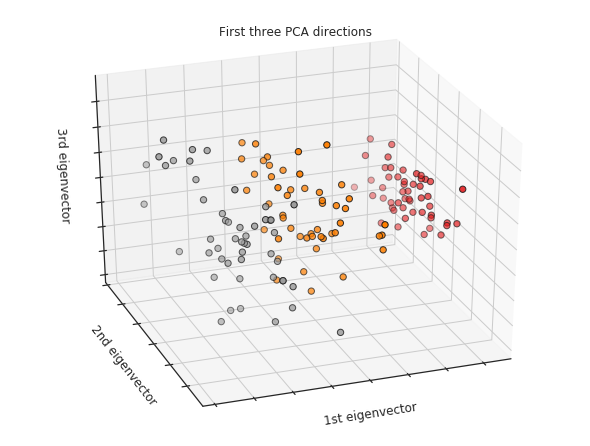

In [8]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

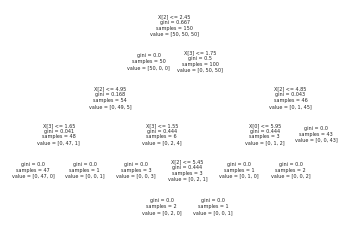

In [9]:
#Ex2 q1
dt_Gini = DecisionTreeClassifier(criterion = 'gini', random_state=42)
tree.plot_tree(dt_Gini.fit(iris.data, iris.target))


[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue

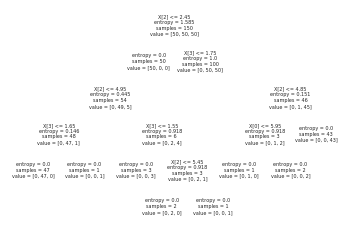

In [10]:
dt_Entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
tree.plot_tree(dt_Entropy.fit(iris.data, iris.target))

In [11]:
#Ex2 q2
#Splittting data
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.33, random_state=42)

#Accurancy score
dt_Gini.fit(X_train, y_train)
dt_Entropy.fit(X_train, y_train)
print("The accurancy of dt_Gini on training data is: ", accuracy_score(y_train, dt_Gini.predict(X_train)))
print("The accurancy of dt_Gini on testing dara is: ", accuracy_score(y_test, dt_Gini.predict(X_test)))
print("The accurancy of dt_Entropy on training data is: ", accuracy_score(y_train, dt_Entropy.predict(X_train)))
print("The accurancy of dt_Entropy on testing data is: ", accuracy_score(y_test, dt_Entropy.predict(X_test)))
#Conclusion: For this case, the accurancy score for these decision trees are pretty good(one is 0.96, another reachs 0.98), so models don't have risk of overfitting.

The accurancy of dt_Gini on training data is:  1.0
The accurancy of dt_Gini on testing dara is:  0.98
The accurancy of dt_Entropy on training data is:  1.0
The accurancy of dt_Entropy on testing data is:  0.98


In [12]:
#Cross-validation score 
score_gini=np.mean(cross_val_score(dt_Gini, iris.data, iris.target, cv=5))
score_Entropy=np.mean(cross_val_score(dt_Entropy, iris.data, iris.target, cv=5))
print("The cross-validation score of dt_Gini is: ", score_gini)
print("The cross-validation score of dt_Entropy is: ", score_Entropy)

The cross-validation score of dt_Gini is:  0.9533333333333334
The cross-validation score of dt_Entropy is:  0.9533333333333334


In [13]:
#Zero-rule classification(most common classvalue algorithm)
mostFreCla = DummyClassifier(strategy="most_frequent", random_state=42)
mostFreCla.fit(X_train, y_train)
print("The accurancy of most frequence classifier on training data is: ", accuracy_score(y_train, mostFreCla.predict(X_train)))
print("The accurancy of most frequence classifier on testing data is: ", accuracy_score(y_test, mostFreCla.predict(X_test)))
score_mostFreCla=np.mean(cross_val_score(mostFreCla, iris.data, iris.target, cv=5))
print("The cross-validation score of mostFreCla is: ", score_mostFreCla)
#Conclusion: Because the distribution of different clusters is well balanced, so in this case, it doesn't have the risk of overfitting either. 

The accurancy of most frequence classifier on training data is:  0.35
The accurancy of most frequence classifier on testing data is:  0.3
The cross-validation score of mostFreCla is:  0.3333333333333333


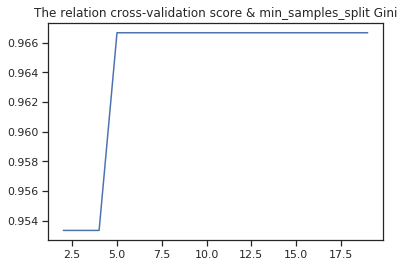

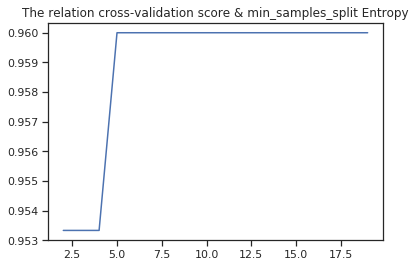

In [14]:
#Ex2 q3
listScoreGini = []
listScoreEntropy = []
start = 2 
stop = 20
for i in range(start,stop):
  dt_Gini = DecisionTreeClassifier(criterion = 'gini', min_samples_split=i, random_state=42)
  dt_Entropy = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=i, random_state=42)
  score_gini=np.mean(cross_val_score(dt_Gini, iris.data, iris.target, cv=5))
  score_Entropy=np.mean(cross_val_score(dt_Entropy, iris.data, iris.target, cv=5))
  listScoreGini.append(score_gini)
  listScoreEntropy.append(score_Entropy)

plt.plot(range(start,stop), listScoreGini)
plt.title("The relation cross-validation score & min_samples_split Gini")
plt.show()
plt.plot(range(start,stop), listScoreEntropy)
plt.title("The relation cross-validation score & min_samples_split Entropy")
plt.show()

#Conclusion: From this experiment we can find that when min_samples_split == 5, we will reach the highest accurancy score for both model. 

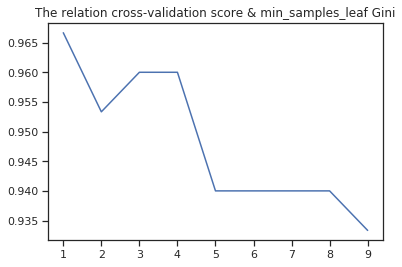

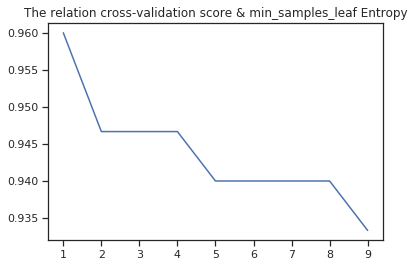

In [15]:
listScoreGini = []
listScoreEntropy = []
start = 1 
stop = 10
for i in range(start,stop):
  dt_Gini = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=i, min_samples_split=5, random_state=42)
  dt_Entropy = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=i, min_samples_split=5, random_state=42)
  score_gini=np.mean(cross_val_score(dt_Gini, iris.data, iris.target, cv=5))
  score_Entropy=np.mean(cross_val_score(dt_Entropy, iris.data, iris.target, cv=5))
  listScoreGini.append(score_gini)
  listScoreEntropy.append(score_Entropy)

plt.plot(range(start,stop), listScoreGini)
plt.title("The relation cross-validation score & min_samples_leaf Gini")
plt.show()
plt.plot(range(start,stop), listScoreEntropy)
plt.title("The relation cross-validation score & min_samples_leaf Entropy")
plt.show()
#Conlcusion: From this experiment we can find that when min_samples_leaf == 1 with min_samples_split == 5, we will reach the highest accurancy score for both model. 

The maximum accurancy is  0.9800000000000001


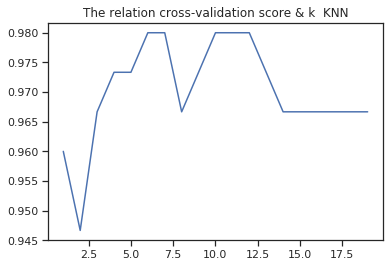

In [16]:
listScoreKNN = []
start = 1
stop = 20
for i in range(start,stop):
  KNN = KNeighborsClassifier(n_neighbors=i)
  score_KNN=np.mean(cross_val_score(KNN, iris.data, iris.target, cv=5))
  listScoreKNN.append(score_KNN)
plt.plot(range(start,stop), listScoreKNN)
plt.title("The relation cross-validation score & k  KNN")
print("The maximum accurancy is ", max(listScoreKNN))